In [43]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l


# 生成数据集

In [44]:
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0,1,(num_examples,len(w)))
    y = torch.matmul(X,w) + b
    y += torch.normal(0,0.01,y.shape)

    return X, y.reshape((-1,1))
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [45]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.6831,  0.9486]) 
label: tensor([-0.3929])


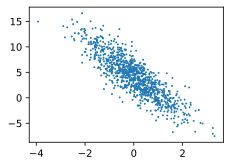

In [46]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);


In [47]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    #把下标打乱
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [48]:
batch_size = 10
for X_b, y_b in data_iter(batch_size,features,labels):
    print(X_b,'\n',y_b)
    break

tensor([[ 0.2702, -0.4192],
        [ 2.3197, -0.7875],
        [-2.5880,  0.1632],
        [-1.7996,  0.9121],
        [-1.2107, -1.9223],
        [ 0.7499,  0.1772],
        [-1.1405, -0.9608],
        [ 1.0899, -0.6000],
        [ 1.5830,  0.3186],
        [ 0.1308,  1.3743]]) 
 tensor([[ 6.1666],
        [11.5128],
        [-1.5273],
        [-2.4916],
        [ 8.3168],
        [ 5.1064],
        [ 5.1775],
        [ 8.4338],
        [ 6.2855],
        [-0.2027]])


## 初始化模型参数

In [49]:
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

## 定义模型
线性回归模型

In [50]:
def linreg(X, w, b):
    '''线性回归'''
    return torch.matmul(X, w) + b

## 定义损失函数
均方损失

In [51]:
def squared_loss(y_hat, y):
    return (y_hat-y.reshape(y_hat.shape))**2/2

## 定义优化函数
小批量随机梯度下降

In [52]:
def sgd(params, lr, batch_size):
    #1、torch.no_grad()就是让这里面的变量运算时不计算梯度，会加快速度，只能在
    #   已经求导过一次的变量上用
    #2、因为计算loss时是计算一个batch总的loss，所以要除以batch_size
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad / batch_size
            #梯度清零
            param.grad.zero_()

## 训练
1、初始化
2、计算梯度，更新参数

In [53]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X,w, b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')


epoch 1, loss 0.032425
epoch 2, loss 0.000116
epoch 3, loss 0.000051


In [54]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')


w的估计误差: tensor([ 0.0007, -0.0002], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0004], grad_fn=<RsubBackward1>)
